In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,10]

In [3]:
df = pd.read_csv("Dummydata_v2.csv",index_col='id')

In [4]:
math = df.loc[:,"grade1_maths":"grade10_maths"]
science = df.loc[:,"grade1_science":"grade10_science"]
language = df.loc[:,"grade1_language":"grade10_language"]
df['avg_math'] = math.mean(axis=1)
df['avg_science'] = science.mean(axis=1)
df['avg_language'] = language.mean(axis=1)

In [5]:
df4c = df.loc[:,"grade1_maths":"grade10_language"]
df4c.head()

,grade1_maths,grade2_maths,grade3_maths,grade4_maths,grade5_maths,grade6_maths,grade7_maths,grade8_maths,grade9_maths,grade10_maths,...,grade1_language,grade2_language,grade3_language,grade4_language,grade5_language,grade6_language,grade7_language,grade8_language,grade9_language,grade10_language
id,,,,,,,,,,,,,,,,,,,,,
1,72,59,61,74,83,65,82,75,76,88,...,74,90,97,100,87,95,99,100,85,99
2,69,74,78,79,61,81,70,82,68,87,...,88,83,100,100,100,84,87,74,69,78
3,90,95,78,84,90,71,61,66,48,48,...,93,94,93,76,92,86,67,54,40,22
4,47,51,63,48,43,27,28,20,21,22,...,44,41,45,30,16,31,31,39,27,22
5,76,56,66,85,99,100,98,100,100,94,...,75,85,72,67,49,32,36,42,54,54


In [6]:
from sklearn.cluster import AgglomerativeClustering

#Agglomorative Clustering - Ward linkage 
clust_hac_ward = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hac_ward = clust_hac_ward.fit_predict(df4c)

#Agglomorative Clustering - average linkage 
clust_hac_avg = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')
hac_avg = clust_hac_avg.fit_predict(df4c)

#Agglomorative Clustering - complete linkage 
clust_hac_cmplt = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hac_cmplt = clust_hac_cmplt.fit_predict(df4c)

df['label_ward'] = clust_hac_ward.labels_
df['label_avg'] = clust_hac_avg.labels_
df['label_cmplt'] = clust_hac_cmplt.labels_

In [7]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)

df['label_km'] = km.fit_predict(df4c)

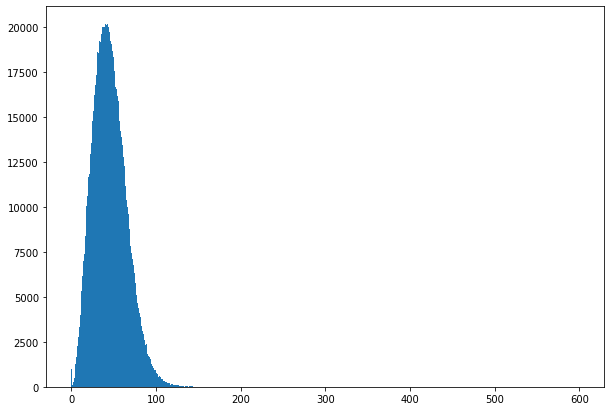

In [8]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

pairwise = pd.DataFrame(
    squareform(pdist(df.loc[:,'avg_math':'avg_language'])),
    columns = df4c.index,
    index = df4c.index
)

dist_flat = pairwise.to_numpy().flatten('F')

plt.figure(figsize=(10,7))
plt.hist(dist_flat,bins=np.arange(600))
plt.show()

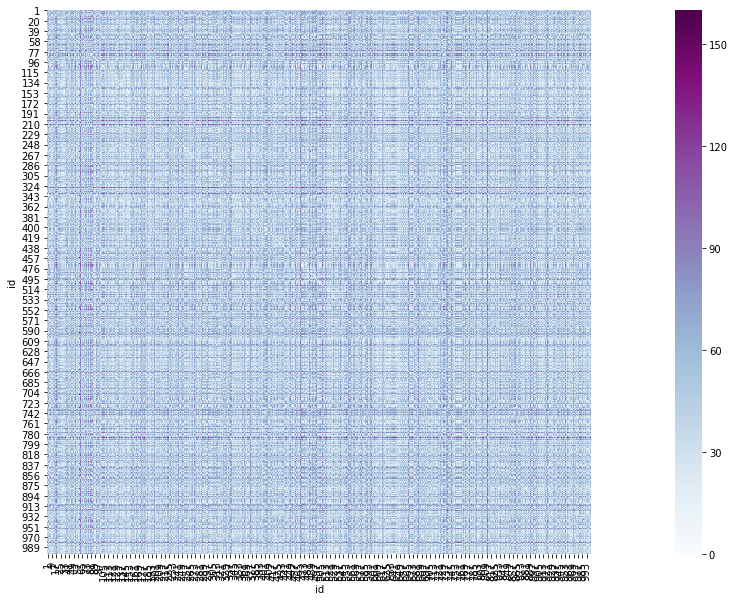

In [9]:
import seaborn as sns
plt.figure(figsize=(30,10))
sns.heatmap(
    pairwise,
    cmap='BuPu',
    square=True
)

In [10]:
import plotly
import plotly.graph_objs as go
def getTrace(x, y, z, c, label, s=2):
    trace_points = go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        marker=dict(size=s, line=dict(color='rgb(0, 0, 0)', width=0.5), color=c, opacity=1),
        name=label
    )
    return trace_points;

def showGraph(title, x_colname, x_range, y_colname, y_range, z_colname, z_range, traces):
    layout = go.Layout(
        title=title,
        scene = dict(
            xaxis=dict(title=x_colname, range = x_range),
            yaxis=dict(title=y_colname, range = y_range),
            zaxis=dict(title=z_colname, range = z_range)
            )
        )

    fig = go.Figure(data=traces, layout=layout)
    plotly.offline.plot(fig)

In [16]:
t1 = getTrace(df[df.label_km == 0].avg_math, df[df.label_km ==0].avg_science, df[df.label_km == 0].avg_language, s= 4, c='blue', label = '0')
t2 = getTrace(df[df.label_km == 1].avg_math, df[df.label_km ==1].avg_science, df[df.label_km == 1].avg_language, s= 4, c='green', label = '1')
t3 = getTrace(df[df.label_km == 2].avg_math, df[df.label_km ==2].avg_science, df[df.label_km == 2].avg_language, s= 4, c='red', label = '2')

x=df.avg_math
y=df.avg_science
z=df.avg_language
showGraph("Clustering results", "Math avg", [min(x),max(x)], "Science avg", [min(y),max(y)], "Language avg", [min(z)-1,max(z)], [t1,t2,t3])

In [23]:
from sklearn import metrics
print('Silhouette measure (all grades):')
print('K-means - %f' %metrics.silhouette_score(df4c,df['label_km'],metric='sqeuclidean'))
print('HAC ward - %f' %metrics.silhouette_score(df4c,df['label_ward'],metric='sqeuclidean'))
print('HAC average - %f' %metrics.silhouette_score(df4c,df['label_avg'],metric='sqeuclidean'))
print('HAC complete - %f' %metrics.silhouette_score(df4c,df['label_cmplt'],metric='sqeuclidean'))

Silhouette measure (all grades):
K-means - 0.344511
HAC ward - 0.255668
HAC average - 0.291257
HAC complete - 0.227100


In [22]:
from sklearn import metrics
print('Silhouette measure (avg grade):')
print('K-means - %f' %metrics.silhouette_score(df.loc[:,'avg_math':'avg_language'],df['label_km'],metric='sqeuclidean'))
print('HAC ward - %f' %metrics.silhouette_score(df.loc[:,'avg_math':'avg_language'],df['label_ward'],metric='sqeuclidean'))
print('HAC average - %f' %metrics.silhouette_score(df.loc[:,'avg_math':'avg_language'],df['label_avg'],metric='sqeuclidean'))
print('HAC complete - %f' %metrics.silhouette_score(df.loc[:,'avg_math':'avg_language'],df['label_cmplt'],metric='sqeuclidean'))

Silhouette measure (avg grade):
K-means - 0.435158
HAC ward - 0.323908
HAC average - 0.354065
HAC complete - 0.289279


In [26]:
for i in range(3,10):
    km = KMeans(n_clusters=i,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
    print('K-means - %f' %metrics.silhouette_score(df4c,km.fit_predict(df4c),metric='sqeuclidean'))

K-means - 0.344511
K-means - 0.320196
K-means - 0.318927
K-means - 0.305408
K-means - 0.282931
K-means - 0.277150
K-means - 0.255258


In [27]:
for i in range(3,10):
    km = KMeans(n_clusters=i,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
    print('K-means - %f' %metrics.silhouette_score(df.loc[:,'avg_math':'avg_language'],km.fit_predict(df.loc[:,'avg_math':'avg_language']),metric='sqeuclidean'))

K-means - 0.435628
K-means - 0.417981
K-means - 0.435900
K-means - 0.420132
K-means - 0.416918
K-means - 0.426351
K-means - 0.407516
